# Applied Data Science Capstone Project

## Examining Conditions To Open A Specific Restaurant In Hamburg, Germany!

## Table of contents
* [1 Outlining](#Outlining)
* [1.1 Introduction to Business Problem](#Intro)
* [1.2 Approach](#Approach)
* [2 Data Source](#DataSource)
* [3 Building Prequisites](#Prerequisites)
* [3.1 Building Dataset for Hamburg, Germany](#Building)
* [3.2 Collecting additional data](#Collection)
* [4 Summary](#Summary)
* [4.1 Findings](#Findings)
* [4.2 Conclusion](#Conclusion)
* [4.3 Outlook](#Outlook)

### 1 Outlining <a name="Outlining"></a>

#### 1.1 Introduction to Business Problem <a name="Intro"></a>


After Berlin Hamburg is the largest city in Germany and largest non-capital city in the European Union with almost <b>1.9 million inhabitants</b>. It is known for it is long rich history dating back more than 1,000 years, famous architecture (e.g. Elbphilharmonie, UNESCO awarded Speicherstadt etc.) and it is famous night life, like the Reeperbahn. Furthermore Hamburg is very diverse. On the one hand there are in comparison poor boroughs with small income and high unemployment rate while some boroughs are extraordinary wealthy. The true potential lies in the density of the city. With <b>2,453 people per square meter</b> and more than <b>300,000 commuters</b> every day it has potential customers that their belly want to be filled on a regular basis. The exciting part for a data scientist is to analyze with Foursquare the ideal location within Hamburg and what kind of cuisine should be offered when the restaurant is opening.

#### 1.2 Approach <a name="Approach"></a>

Next to the cuisine skills all economic options should be considered when opening a restaurant. The lack of information regarding the location, competitors in the neighborhood and appeal of them can be reduced by using the Foursquare API. An similiar known approach like New York City and Toronto will be chosen for the destination Hamburg, Germany. After extracting the data for Hamburg from Foursquare an examination will be done as follows:

<b> 1. What is a suitable location?</b> 

<b> 2. What kind of cuisine should be offered?</b> 

<b> 3. What are necessary informations about the chosen location?</b> 
    
In the end a summary will give a recommendation of a location and cuisine style (e.g. Afghan, Asian, Italian etc.).

### 2 Data Source <a name="DataSource"></a>

First of all a dataset of Hamburg will be built which provides information on boroughs, neighborhoods and corresponding data. After that the Foursquare API will be used to analyze the situation in each borough and neighborhood. A conclusion where the findings of the created data will be provided. 

### 3 Building Prerequisites <a name="Prerequisites"></a>

#### 3.1 Building Dataset for Hamburg, Germany <a name="Building"></a>

In the following a dataset with all borough, neighborhoods and corresponding data (TBD!) will be built.

In [194]:
# importing necessary libraries

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


__________________________

In [231]:
# importing pre-defined csv file, using semicolon as delimiter, HH official abbreviation for Hamburg

df_HH = pd.read_csv('HH_Stadtteile_Bezirke_konvertiert.csv', delimiter = ";", decimal = ",")

df_HH.head()
# source 'https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs'

,Stadtteil,Ortsteile,Bezirk,Fläche (km²),Einwohner,Bevölkerungs­dichte (Einwohner/km²),Koordinaten
0,Wohldorf-Ohlstedt,523,Wandsbek,17.3,4650,269,"53.6927777777778, 10.1311111111111"
1,Winterhude,408–413,Hamburg-Nord,7.6,55491,7301,"53.6, 10"
2,Wilstorf,705,Harburg,3.4,17658,5194,"53.4436111111111, 9.98416666666667"
3,Wilhelmsburg,135–137,Hamburg-Mitte,35.4,53518,1512,"53.495, 10.0111111111111"
4,Wellingsbüttel,517,Wandsbek,4.1,10848,2646,"53.6377777777778, 10.0811111111111"


In [232]:
# shape of dataframe

df_HH.shape

(104, 7)

In [233]:
# translating headers, dropping unrelated columns, creating/ editing specific columns

df_HH.rename(columns={"Stadtteil": "Neighborhood", "Bezirk": "Borough", "Fläche (km²)": "Area (square kilometers)", "Einwohner":"Population","Bevölkerungs­dichte (Einwohner/km²)":"Population Density per Sq.km", "Koordinaten":"Coordinates"}, inplace = True)

df_HH[['Latitude','Longitude']] = df_HH.Coordinates.str.split(", ",expand=True,).astype(float).round(6)

#df_HH[['Area (square kilometers)']].astype(int)

df_HH.drop(['Ortsteile', 'Coordinates'], axis=1, inplace = True)

df_HH.head()

,Neighborhood,Borough,Area (square kilometers),Population,Population Density per Sq.km,Latitude,Longitude
0,Wohldorf-Ohlstedt,Wandsbek,17.3,4650,269,53.692778,10.131111
1,Winterhude,Hamburg-Nord,7.6,55491,7301,53.600000,10.000000
2,Wilstorf,Harburg,3.4,17658,5194,53.443611,9.984167
3,Wilhelmsburg,Hamburg-Mitte,35.4,53518,1512,53.495000,10.011111
4,Wellingsbüttel,Wandsbek,4.1,10848,2646,53.637778,10.081111


In [234]:
# shape of dataframe, (104 neighborhoods in Hamburg, 7 Headers)

df_HH.shape

(104, 7)

In [235]:
# number boroughs, (7 boroughs)

df_HH_Borough = df_HH['Borough'].unique()

print("Number of boroughs in Dataframe Hamburg is", len(df_HH_Borough))

Number of boroughs in Dataframe Hamburg is 7


__________________________
displaying neighboorhoods of Hamburg

In [236]:
# importing exact location of Hamburg, Germany

from geopy.geocoders import Nominatim

address = 'Hamburg, Hamburg'

geolocator = Nominatim(user_agent="geo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hamburg are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hamburg are 53.550341, 10.000654.


In [237]:
# visualizing map of Hamburg

#importing folium to generate map
import folium # map rendering library

# creating variable
map_HH = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_HH['Latitude'], df_HH['Longitude'], df_HH['Borough'], df_HH['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FFFFFF',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HH)  

# display created map
map_HH

#### 3.2 Collecting additional data for Hamburg, Germany <a name="Collection"></a>

In the following additional data will be collected. This will be Foursqaure API and information about boroughs and neighborhoods.

In [238]:
# examining most dense nieghborhoods with most inhabitants per square kilometer
df_HH.sort_values(by=['Population Density per Sq.km'], ascending = False)

,Neighborhood,Borough,Area (square kilometers),Population,Population Density per Sq.km,Latitude,Longitude
61,Hoheluft-West,Eimsbüttel,0.7,13435,19193,53.580000,9.967222
80,Eimsbüttel,Eimsbüttel,3.3,58004,17577,53.575833,9.951667
13,Sternschanze,Altona,0.5,8092,16184,53.561667,9.962222
62,Hoheluft-Ost,Hamburg-Nord,0.6,9694,16157,53.584722,9.976111
84,Dulsberg,Hamburg-Nord,1.2,17229,14358,53.566667,10.050000
30,Ottensen,Altona,2.8,35585,12709,53.553889,9.917778
81,Eilbek,Wandsbek,1.8,22276,12376,53.567778,10.045556
95,Barmbek-Süd,Hamburg-Nord,3.1,35827,11557,53.580000,10.040556
98,Altona-Nord,Altona,2.2,24536,11153,53.563056,9.945278
96,Barmbek-Nord,Hamburg-Nord,3.8,41875,11020,53.605278,10.040000


In [239]:
# saving dataframe

!pip install dataframe_image
import dataframe_image as dfi
 
dfi.export(df_HH, 'dataframe.png', max_rows = -1)

<a name="InfosBoroughs"></a>

In [246]:
#df_HH.sort_values(by=['Borough'], ascending = False)

df_HH_boroughs = df_HH.groupby(['Borough']).sum()
df_HH_boroughs.drop(['Latitude', 'Longitude'], axis=1, inplace = True)
df_HH_boroughs['Population Density per Sq.km'] = (df_HH_boroughs['Population'] / df_HH_boroughs['Area (square kilometers)']).round(0)
df_HH_boroughs.sort_values(by=['Population Density per Sq.km'], ascending = False)

,Area (square kilometers),Population,Population Density per Sq.km
Borough,,,
Hamburg-Nord,57.9,314593,5433.0
Eimsbüttel,49.9,267051,5352.0
Altona,77.9,275264,3534.0
Wandsbek,147.7,441012,2986.0
Hamburg-Mitte,144.8,295411,2040.0
Harburg,124.8,169426,1358.0
Bergedorf,154.7,130290,842.0


Altona as borough and neighborhoods seems pretty dense and located in the center, let's examine that! Hamburg-Nord and Eimsbüttel are not as centered as Altona.

_______________________________________________________________________________

In [247]:
# setting borough to Altona

Altona_data = df_HH[df_HH['Borough'] == 'Altona'].reset_index(drop=True)

Altona_data.drop(columns = ['Area (square kilometers)', 'Population','Population Density per Sq.km'], inplace = True)

Altona_data = Altona_data[['Borough','Neighborhood','Latitude','Longitude']]

In [176]:
# displaying Altona dataframe
Altona_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Altona,Sülldorf,53.585000,9.794167
1,Altona,Sternschanze,53.561667,9.962222
2,Altona,Rissen,53.583056,9.753611
3,Altona,Ottensen,53.553889,9.917778
4,Altona,Othmarschen,53.552778,9.894444


<a name="centeredAltona"></a>

In [177]:
# visualizing map of Hamburg-Altona

#importing folium to generate map
import folium # map rendering library

# creating variable
map_HH_Altona = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Altona_data['Latitude'], Altona_data['Longitude'], Altona_data['Borough'], Altona_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FFFFFF',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HH_Altona)  

# display created map
map_HH_Altona

In [202]:
map_HH_Altona.save("indexA.html")

__________________________

Entering foursquare credentials to access data

In [178]:
# defining foursquare credentials

CLIENT_ID = 'UMBCPU1QPLEDWMZ1D0RK0C1BLYRE3IAP0X2NWWBDHXJ5MXFX' # your Foursquare ID
CLIENT_SECRET = 'ZO4YXH2LVDN21KUTAVZE5TED4F2A0VO3D1HJN4C1ZAHS1HKI' # your Foursquare Secret
VERSION = '20210623' # Foursquare API version
LIMIT = 1000 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UMBCPU1QPLEDWMZ1D0RK0C1BLYRE3IAP0X2NWWBDHXJ5MXFX
CLIENT_SECRET:ZO4YXH2LVDN21KUTAVZE5TED4F2A0VO3D1HJN4C1ZAHS1HKI


Defining function for getting venues

In [179]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Executing venue function

In [180]:
HH_Altona_venues = getNearbyVenues(names = Altona_data['Neighborhood'],
                                   latitudes = Altona_data['Latitude'],
                                   longitudes = Altona_data['Longitude']
                                  )

Sülldorf
Sternschanze
Rissen
Ottensen
Othmarschen
Osdorf
Nienstedten
Lurup
Iserbrook
Groß Flottbek
Blankenese
Bahrenfeld
Altona-Nord
Altona-Altstadt


Size and shape of dataframe venues

In [181]:
print(HH_Altona_venues.shape)
HH_Altona_venues.head()

(256, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sülldorf,53.585000,9.794167,Biohof Timmermann,53.583511,9.794401,Organic Grocery
1,Sülldorf,53.585000,9.794167,Reitstall Langeloh,53.581878,9.795168,Farm
2,Sülldorf,53.585000,9.794167,Motorradvermietung Hamburg,53.580946,9.792053,Rental Car Location
3,Sternschanze,53.561667,9.962222,Quan 36,53.561073,9.962918,Vietnamese Restaurant
4,Sternschanze,53.561667,9.962222,Superbude St. Pauli,53.560331,9.959941,Hostel


In [182]:
# grouping venues
HH_Altona_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Altona-Altstadt,26,26,26,26,26,26
Altona-Nord,27,27,27,27,27,27
Bahrenfeld,12,12,12,12,12,12
Blankenese,21,21,21,21,21,21
Groß Flottbek,10,10,10,10,10,10
Iserbrook,6,6,6,6,6,6
Lurup,3,3,3,3,3,3
Nienstedten,9,9,9,9,9,9
Osdorf,10,10,10,10,10,10


In [183]:
# counting unique categories
print('There are {} uniques categories.'.format(len(HH_Altona_venues['Venue Category'].unique())))

There are 105 uniques categories.


In [184]:
# one hot encoding
HH_Altona_onehot = pd.get_dummies(HH_Altona_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
HH_Altona_onehot['Neighborhood'] = HH_Altona_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [HH_Altona_onehot.columns[-1]] + list(HH_Altona_onehot.columns[:-1])
HH_Altona_onehot = HH_Altona_onehot[fixed_columns]

HH_Altona_onehot.head()

,Wine Shop,Accessories Store,Arcade,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Beach,Beach Bar,Beer Bar,Beer Store,Bistro,Bookstore,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Café,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Cultural Center,Currywurst Joint,Dessert Shop,Doner Restaurant,Drugstore,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Flower Shop,Food & Drink Shop,French Restaurant,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Kids Store,Korean Restaurant,Kumpir Restaurant,Light Rail Station,Liquor Store,Market,Mexican Restaurant,Music Venue,Neighborhood,Nightclub,Optical Shop,Organic Grocery,Palatine Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pub,Record Shop,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Snack Place,Soccer Field,Soup Place,Souvlaki Shop,Spanish Restaurant,Sports Club,Sri Lankan Restaurant,Steakhouse,Street Food Gathering,Supermarket,Tapas Restaurant,Taverna,Tea Room,Thai Restaurant,Theater,Trail,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sülldorf,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sülldorf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sülldorf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sternschanze,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Sternschanze,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [185]:
# shape of parkwood_onehot

HH_Altona_onehot.shape

(256, 105)

In [186]:
# grouping elements

HH_Altona_grouped = HH_Altona_onehot.groupby('Neighborhood').mean().reset_index()
HH_Altona_grouped

,Neighborhood,Wine Shop,Accessories Store,Arcade,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Beach,Beach Bar,Beer Bar,Beer Store,Bistro,Bookstore,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Café,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Cultural Center,Currywurst Joint,Dessert Shop,Doner Restaurant,Drugstore,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Flower Shop,Food & Drink Shop,French Restaurant,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Kids Store,Korean Restaurant,Kumpir Restaurant,Light Rail Station,Liquor Store,Market,Mexican Restaurant,Music Venue,Nightclub,Optical Shop,Organic Grocery,Palatine Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pub,Record Shop,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Snack Place,Soccer Field,Soup Place,Souvlaki Shop,Spanish Restaurant,Sports Club,Sri Lankan Restaurant,Steakhouse,Street Food Gathering,Supermarket,Tapas Restaurant,Taverna,Tea Room,Thai Restaurant,Theater,Trail,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wine Bar
0,Altona-Altstadt,0.00,0.00,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.0,0.038462,0.038462,0.00,0.00,0.000000,0.00,0.000000,0.00,0.038462,0.038462,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.038462,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.076923,0.000000,0.00,0.076923,0.038462,0.000000,0.00,0.076923,0.00,0.00,0.00,0.000000,0.00,0.00,0.038462,0.00,0.038462,0.00,0.038462,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.076923,0.00,0.000000,0.038462,0.00,0.000000,0.038462,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.038462,0.000000,0.00,0.000000,0.038462,0.038462,0.038462,0.000000,0.038462,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.00,0.000000
1,Altona-Nord,0.00,0.00,0.000000,0.037037,0.037037,0.111111,0.000000,0.037037,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.074074,0.00,0.00,0.037037,0.037037,0.00,0.0,0.000000,0.000000,0.00,0.00,0.037037,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.037037,0.037037,0.000000,0.00,0.037037,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.037037,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.037037,0.00,0.000000,0.00,0.00,0.037037,0.000000,0.037037,0.000000,0.00,0.037037,0.037037,0.000000,0.00,0.000000,0.037037,0.00,0.000000,0.000000,0.037037,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.037037,0.00,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.037037,0.00,0.000000
2,Bahrenfeld,0.00,0.00,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.166667,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.083333,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.166667,0.000000,0.00,0.083333,0.000000,0.000000,0.00,0.166667,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.166667,0.00,0.083333,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,Blankenese,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.047619,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.142857,0.00,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.

In [187]:
# shape of grouped dataframe

HH_Altona_grouped.shape

(14, 105)

In [188]:
# Top 10 venues

num_top_venues = 10

for hood in HH_Altona_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = HH_Altona_grouped[HH_Altona_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Altona-Altstadt----
                    venue  freq
0    Gym / Fitness Center  0.08
1      Italian Restaurant  0.08
2                     Pub  0.08
3                   Hotel  0.08
4        Tapas Restaurant  0.04
5            Cocktail Bar  0.04
6          Clothing Store  0.04
7  Furniture / Home Store  0.04
8               Drugstore  0.04
9             Sports Club  0.04


----Altona-Nord----
                    venue  freq
0                  Bakery  0.11
1                 Brewery  0.07
2                Bus Stop  0.04
3                   Hotel  0.04
4       French Restaurant  0.04
5  Furniture / Home Store  0.04
6          Shipping Store  0.04
7                   Plaza  0.04
8       German Restaurant  0.04
9              Playground  0.04


----Bahrenfeld----
                  venue  freq
0    Italian Restaurant  0.17
1  Gym / Fitness Center  0.17
2            Restaurant  0.17
3              Bus Stop  0.17
4        Sandwich Place  0.08
5      Asian Restaurant  0.08
6           Event S

In [189]:
# function for most common venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<a name="venuesAltona"></a>

In [190]:
# Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = HH_Altona_grouped['Neighborhood']

for ind in np.arange(HH_Altona_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HH_Altona_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altona-Altstadt,Gym / Fitness Center,Italian Restaurant,Pub,Hotel,Tapas Restaurant,Cocktail Bar,Clothing Store,Furniture / Home Store,Drugstore,Sports Club
1,Altona-Nord,Bakery,Brewery,Bus Stop,Hotel,French Restaurant,Furniture / Home Store,Shipping Store,Plaza,German Restaurant,Playground
2,Bahrenfeld,Italian Restaurant,Gym / Fitness Center,Restaurant,Bus Stop,Sandwich Place,Asian Restaurant,Event Space,Hotel,Pet Store,Record Shop
3,Blankenese,Café,Seafood Restaurant,Ice Cream Shop,Pier,Supermarket,Tapas Restaurant,Harbor / Marina,Tea Room,Hotel,Plaza
4,Groß Flottbek,Supermarket,Hotel,German Restaurant,Restaurant,Café,Grocery Store,Pharmacy,Farmers Market,Bakery,Park
5,Iserbrook,Hotel,Bakery,Bank,Organic Grocery,Pet Store,Supermarket,Wine Shop,Park,Rental Car Location,Record Shop
6,Lurup,Supermarket,Playground,Bus Stop,Paper / Office Supplies Store,Rental Car Location,Record Shop,Pub,Plaza,Pizza Place,Pier
7,Nienstedten,Wine Bar,Garden,Bakery,Ice Cream Shop,Hotel,Flower Shop,Grocery Store,Pharmacy,Park,Record Shop
8,Osdorf,Bank,Wine Shop,Chinese Restaurant,Supermarket,Pet Store,Liquor Store,Ice Cream Shop,Drugstore,Indie Movie Theater,Beach Bar
9,Othmarschen,Bus Stop,German Restaurant,Wine Shop,Paper / Office Supplies Store,Rental Car Location,Record Shop,Pub,Plaza,Playground,Pizza Place


It seems that in Nienstedten listed under the top 10 venues no restaurant.

<a name="incomeAltona"></a>

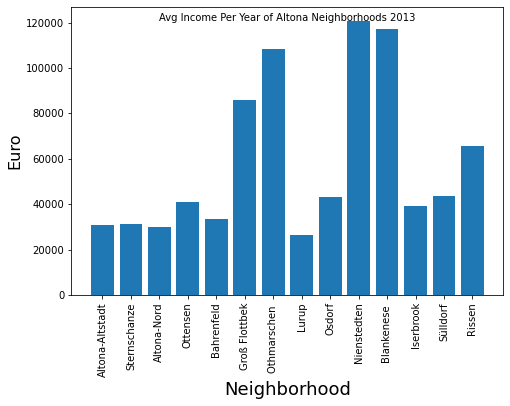

In [205]:
# importing average yearly income per neighborhood of borough Altona in 2013, using encoder ANSI for ß and ü

df_income_Altona_neighborhood = pd.read_csv('Altona_Average_Income_2013.csv', delimiter = ";", encoding = 'ANSI')

#df_income_Altona_neighborhood.sort_values(by=['Average Income Per Year'], ascending = False)

# source https://www.shz.de/regionales/hamburg/mehr-steuerpflichtige-in-hamburg-durchschnittseinkommen-bei-39-054-euro-id18048351.html

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
neighborhood_plot = df_income_Altona_neighborhood['Neighborhood']
average_income_plot = df_income_Altona_neighborhood['Average Income Per Year']
ax.bar(neighborhood_plot,average_income_plot)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
fig.suptitle('Avg Income Per Year of Altona Neighborhoods 2013', fontsize=10)
plt.xlabel('Neighborhood', fontsize=18)
plt.ylabel('Euro', fontsize=16)
plt.show()

The neighborhood Nienstedten has the highest Average Income Per Year.

### 4 Summary <a name="Summary"></a>


#### 4.1 Findings <a name="Findings"></a>

In the following the data will be summarized.

After gathering the data for Hamburg the borough Altona was chosen. This was because Altona is centered ([source](#centeredAltona)), second most dense and with high amount of inhabitants ([source](#InfosBoroughs)). Hamburg-Nord can be disregarded due to the fact that is located in the north of Hamburg and not as centered as Altona. Moreover Altona has significant more tourists with POIs like the harbour, red light district, artist neighborhoods, musical stages and others (https://en.wikipedia.org/wiki/Altona,_Hamburg).

#### 4.2 Conclusion <a name="Conclusion"></a>

In the following the data will be concluded and the initial questions will be answered.

With the gathered data, it can be said there is no restaurant under the top 10 venues in <b> Nienstedten </b> ([source](#venuesAltona)). Moreover it has very high income per year ([source](#incomeAltona)).

The initial questions were:

<b> 1. What is a suitable location? </b> 
    
Nienstedten would be an suitable location, since the inhabitants are especially wealthy and no restaurant is under the top 10 venues according to Foursquare.
            
<b> 2. What kind of cuisine should be offered?</b> 

Since there is no restaurant under the top 10 venues every cuisine can be chosen. 

<b> 3. What are necessary informations about the chosen location?</b> 

Get more information about the neighborhood <b> Nienstedten </b>. For example, what is the rent for space of a restaurant, what are the inhabitants demands and wishes, since they are wealthy etc.

#### 4.3 Outlook <a name="Outlook"></a>
In the following it will be pointed out what might be the next steps.

Certain data was outdated or not available, like the Average Income per Year (2013), more detailed analysis with Premium Foursquare API etc., which can be updated. With this data a more valid predicition could be made. Furthermore a map radius with next restaurant in neighborhoods and with ratings could be included. Some rough data like how much would be the rent, what are the potential clients demand etc. should also be analyzed.

#### ML, 2021